# Bank Customer Churn Prediction

**Objective:** Predict which bank customers are likely to churn based on their demographic and financial data

**Dataset:** BankChurners.csv  
**Source:** Kaggle

**Steps:**
1. Exploratory Data Analysis (EDA)
2. Data Cleaning & Preprocessing
3. Feature Engineering
4. Model Training & Evaluation
5. Interpretation of Results
6. Save Model for Deployment

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/lashmy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Load data set
raw_csv_data = pd.read_csv("Churn_Modelling.csv")
raw_csv_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [4]:
#Copy to another csv & check data/missing values/ understand columns & values
df = raw_csv_data.copy()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


**Exploratory data analysis (EDA) + Visuals**

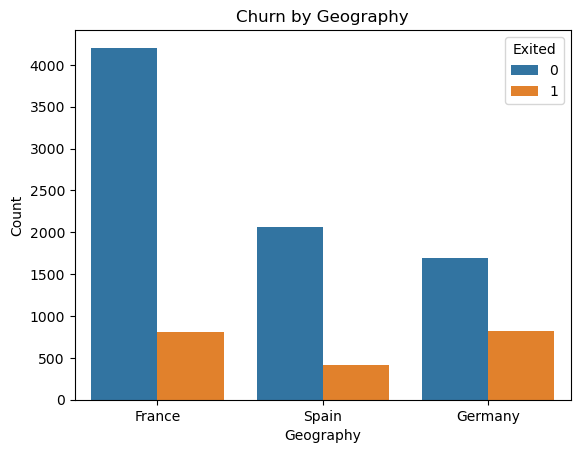

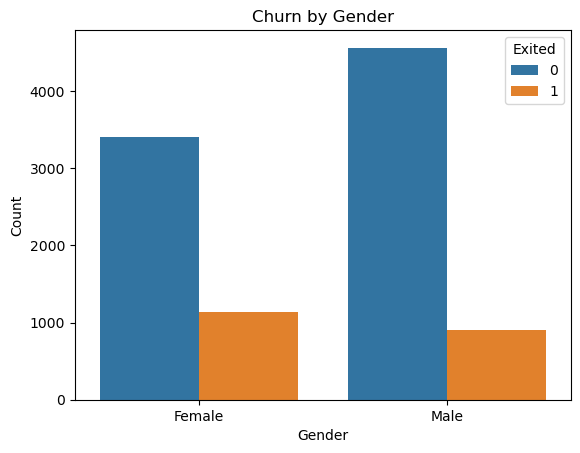

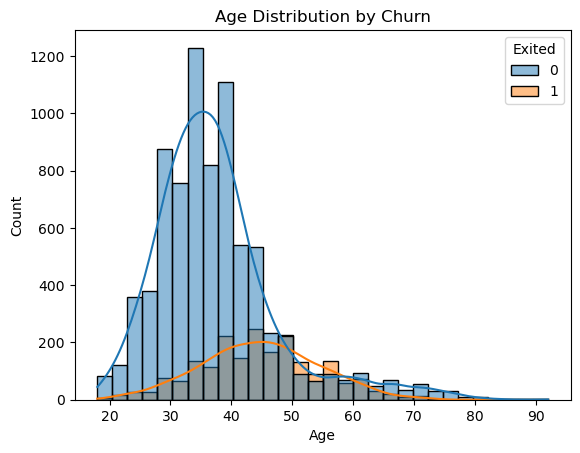

In [5]:
#Demographics Analysis
#By Geography
sns.countplot(x="Geography", hue="Exited", data=df)
plt.title("Churn by Geography")
plt.ylabel("Count")
plt.show()

#By Gender
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Churn by Gender")
plt.ylabel("Count")
plt.show()

#By Age
sns.histplot(df, x="Age", hue="Exited", bins=30, kde=True)
plt.title("Age Distribution by Churn")
plt.show()

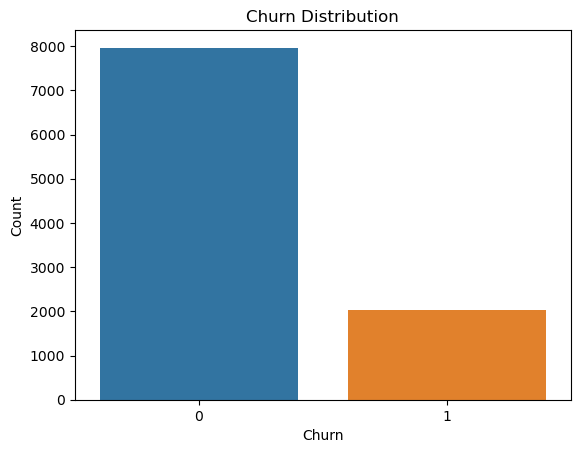

Churn Rate: 20.38%


In [6]:
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

churn_rate = df["Exited"].mean()
print(f"Churn Rate: {churn_rate:.2%}")

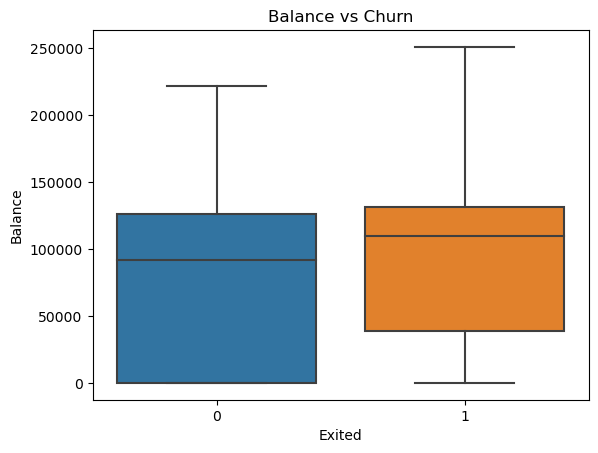

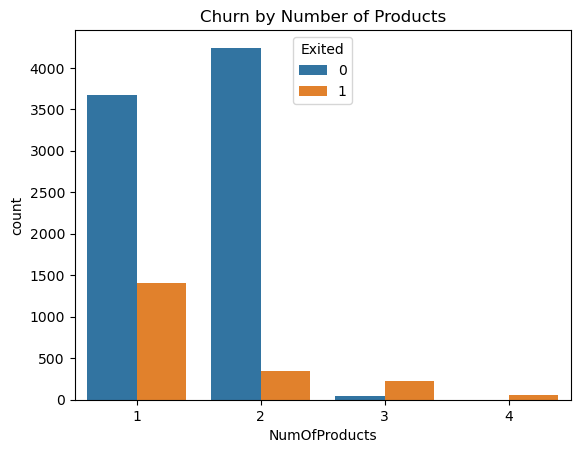

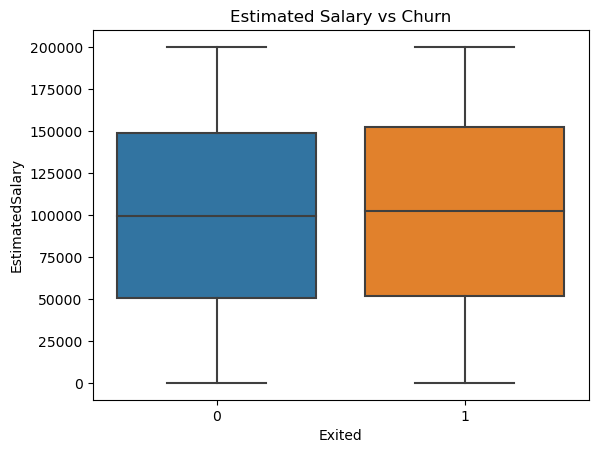

In [7]:
#Financial features analysis
# Balance vs Churn
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()

#Number of products
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Churn by Number of Products")
plt.show()

#Estimated salary
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)
plt.title("Estimated Salary vs Churn")
plt.show()


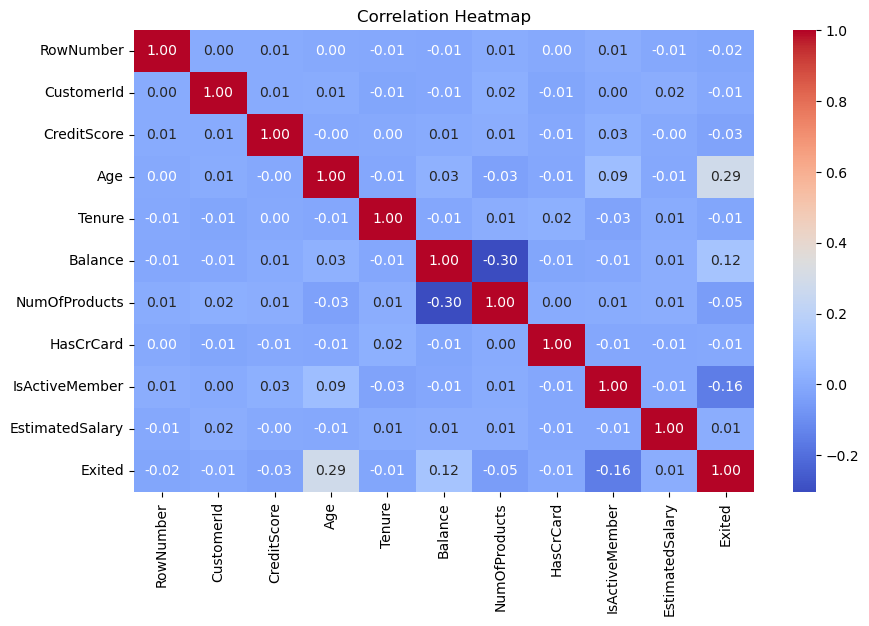

In [9]:
#Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Data Cleaning & Preprocessing**

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
# After checking the values, we can start dropping what it is not useful for this project and double-check is dropped
df.drop(["Surname"],axis=1)
df = df.drop(["Surname"],axis=1)
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
#Geography(one hot encoding) needs to be encode since it is and object & Gender(binary) too

df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1}) #Encode Gender

df = pd.get_dummies(df, columns=["Geography"], drop_first=True) #One-Hot Encode Geography

In [ ]:
#Drop rows with missing values (geography:1, age:1, hascredcard:1, active member:1)
df.dropna()
df.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,0,0
1,2,15647311,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,1
2,3,15619304,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0,0
3,4,15701354,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0
4,5,15737888,850,0,43.0,2,125510.82,1,NaN,1.0,79084.10,0,0,1


In [ ]:
#Fill numeric NaNs with median
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

**Feature Engineering**


In [ ]:
#Define features (X) and target (y)
y = df["Exited"]              #Target
X = df.drop("Exited", axis=1) #Features

**Model Training & Evaluation**

In [ ]:
#Train/Test Split
from sklearn.model_selection import train_test_split

train_test_split(X,y)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.2, random_state=42, stratify=y) #keeps churn ratio balanced


In [ ]:
#Scale numerical features because we will use Logistic Regression, tree models don't need to
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Training the model - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

log_reg.score(X_train_scaled, y_train)

0.8155

Based on the data we used, our model learned to classify 81,55% of the observations correctly

In [ ]:
#Evaluate accuracy on test set / Time to evaluate the model
from sklearn.metrics import accuracy_score, roc_auc_score

#Predictions
y_pred = log_reg.predict(X_test_scaled)

#Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Classification report (precision, recall, F1-score, accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

#Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

#ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

Confusion Matrix:
 [[6104  268]
 [1248  382]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      6372
         1.0       0.59      0.23      0.34      1630

    accuracy                           0.81      8002
   macro avg       0.71      0.60      0.61      8002
weighted avg       0.78      0.81      0.78      8002

Test Accuracy: 0.8105473631592102
ROC-AUC: 0.5961484100300779


**Confusion matrix interpretation:**
- True Negatives (TN) = 6104 - customers who did not churn and were predicted correctly

- False Positives (FP) = 268 - customers who did not churn but were predicted as churners

- False Negatives (FN) = 1248 - customers who churned but were predicted as non-churn

True Positives (TP) = 382 - customers who churned and were predicted correctly
The model correctly predicts most non churners, but it misses many actual churners. Out of 1,630 customers who churned, only 382 were correctly identified. This is typical in datasets where non churners dominate, and suggests we may need class balancing or more advanced models to improve churn detection

**Classification Report:**

Class 0 (Non-churners)

- Precision = 0.83 - 83% of customers predicted as non churn actually did not churn

- Recall = 0.96 - 96% of all actual non-churners were correctly identified

- F1-score = 0.89 - good overall balance between precision and recall

- Support = 6372 - there are 6,372 non churners in the dataset

The model is excellent at identifying non-churners. It rarely predicts non-churn incorrectly, and it catches almost all true non-churners

Class 1 (Churners)

- Precision = 0.59 - Of all predicted churners, only 59% actually churned

- Recall = 0.23 - Only 23% of all actual churners were correctly identified

- F1-score = 0.34 - low → precision and recall are unbalanced

- Support = 1630 - there are 1,630 churners in the dataset

The model struggles to identify churners, missing 77% of actual churners (low recall)
Precision is moderate, when it does predict churn, it is correct more than half the time

About the **ROC-AUC**
While the model correctly predicts most non churners (good accuracy), it is not reliable for identifying churners, which is the group we care about most. To improve, consider class balancing, adjusting thresholds, or using more advanced models.
1 → perfect classifier

0.5 → random guessing

<0.5 → worse than random
Result: 0.596 = only slightly better than random for separating churners (class 1) from nonchurners (class 0)

**Interpretation of Results**

In [ ]:
# Now we want to find the intercept and coefficients
# Intercept
print("Intercept:", log_reg.intercept_)

# Coefficients
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
})

coefficients["Odds_Ratio"] = np.exp(coefficients["Coefficient"])
print(coefficients)


Intercept: [-1.64717722]
              Feature  Coefficient  Odds_Ratio
0           RowNumber    -0.026490    0.973858
1          CustomerId    -0.062477    0.939435
2         CreditScore    -0.064448    0.937585
3              Gender    -0.118519    0.888235
4                 Age     0.783782    2.189737
5              Tenure     0.044804    1.045823
6             Balance     0.070077    1.072590
7       NumOfProducts    -0.081881    0.921382
8           HasCrCard    -0.026336    0.974007
9      IsActiveMember    -0.513506    0.598394
10    EstimatedSalary     0.050654    1.051958
11  Geography_Germany     0.390533    1.477769
12    Geography_Spain    -0.010296    0.989757


**Interpretation:**

Positive coefficient = increases likelihood of churn

Negative coefficient = decreases likelihood of churn

Top Features & Business Insights (Odds Ratios):

- Age (OR = 2.19) → Older customers are more than twice as likely to churn for each additional year

- IsActiveMember (OR = 0.60) → Active members are 40% less likely to churn than inactive ones

- Geography_Germany (OR = 1.48) → Customers from Germany are 48% more likely to churn compared to French customers (reference group)

- Balance (OR = 1.07) → Higher balance slightly increases churn risk

- NumOfProducts (OR = 0.92) → Customers with more products are slightly less likely to churn

Interpretation in business terms:

- High-risk customers: Older, inactive, high-balance customers, especially in Germany

- Low-risk customers: Active members and customers with multiple products

Business recommendations:

- Design targeted retention campaigns for high-risk segments (personalised offers, loyalty programs)

- Monitor older and inactive customers closely to prevent churn

- Encourage customers to adopt more products to reduce churn probability

In [ ]:
#Save Predictions for Analysis
df_test = X_test.copy()
df_test["Actual_Churn"] = y_test
df_test["Predicted_Churn"] = y_pred
df_test.head()

df_test.to_csv("Escritorio/test_predictions.csv", index=False)

**Save model for deployment**

In [ ]:
import joblib

# Save the trained model
joblib.dump(log_reg, "logistic_regression_churn_model.pkl")

# Save the scaler too (needed for new data)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

Model and scaler saved for deployment. They can now be loaded in a web app or API for real-time churn predictions

**Summary**

**Model Performance:**
- Training Accuracy: 81,5% quite good
- Test Accuracy: 81% this tell us how well the model performs on new, unseen data. There’s no big drop between training and test accuracy so the model is not overfitting
- ROC-AUC: 0.596 model not that great at separating churners from non-churners

**Top Features (Odds Ratios):**
- Age (OR = 2.19) - older customers are more than twice as likely to churn

- IsActiveMember (OR = 0.60) - active members are 40% less likely to churn

- Balance (OR = 1.07) - higher balances slightly increase churn likelihood

- NumOfProducts (OR = 0.92) - more products slightly reduce churn likelihood

- Geography_Germany (OR = 1.48) - German customers are more likely to churn than French customers

**Business Insights:**
- Customers with high balance but fewer products are more likely to churn

- Active members and customers with multiple products are less likely to leave

- Targeted retention campaigns (e.g., personalized offers, loyalty incentives) could reduce churn in high-risk segments

**Next Steps:**
- Test more advanced models (Random Forest, XGBoost) to improve churn detection, especially for minority class

- Deploy the model via Streamlit or Flask API for real-time predictions

- Consider retraining regularly with new customer data and explore techniques for class imbalance